In [5]:
import pandas as pd

ua_full_path = '{}/{}'.format(base_path,'ignore/part-00000-359dcc8b-529c-420a-ae4a-bec5c36f625c-c000.csv')
ap_full_path = '{}/{}'.format(base_path,'pos_accept/part-00000-81948405-8a39-4236-b3fa-7ca3b085468b-c000.csv')
an_full_path='{}/{}'.format(base_path,'neg_accpet/part-00000-a28c6a60-36ad-4b43-8c4c-55d2e3de5832-c000.csv')
accept_no_feedback_path = '{}/{}'.format(base_path,'no_feedback_accept/part-00000-2e34ff1c-d49d-45cc-a22f-ba5dbaec5ca9-c000.csv')


In [6]:
ua_model_df= pd.read_csv(ua_full_path)
ua_model_df.head()

,model,os_version
0,SO-02K,9
1,SO-02K,9
2,SO-02K,9
3,SO-02K,9
4,SO-01L,9


In [7]:
ap_model_df =pd.read_csv(ap_full_path)
ap_model_df.head()

,model,os_version
0,SC-01K,9
1,SC-02L,8.1.0
2,SO-03K,9
3,SC-02K,9
4,SC-02K,9


In [10]:
an_model_df =pd.read_csv(an_full_path)
an_model_df.head(10)

,model,os_version
0,SC-01L,9
1,SH-01L,8.1.0
2,SC-01L,9
3,SC-01L,9
4,SC-01L,9
5,SC-01L,9
6,SO-03K,9
7,SC-01L,9
8,SC-01L,9
9,SC-01L,9


In [11]:
accept_no_feedback_df = pd.read_csv(accept_no_feedback_path)
accept_no_feedback_df.head(10)

,model,os_version
0,SC-02K,9
1,SC-02K,9
2,SO-03K,9
3,SH-01L,8.1.0
4,SO-02K,9
5,SC-01L,9
6,SC-03K,9
7,SC-02K,9
8,SC-02L,8.1.0
9,SO-02K,9


In [12]:
ua_model_count_df = ua_model_df.groupby(['model'])\
                                .size()\
                                .sort_values(ascending=False)\
                                .reset_index(name='ua_model_count')

#model_count_df['model_os_version'] = model_count_df[['model','os_version']].apply(lambda x: '_'.join(x), axis=1) 
ua_model_count_df.head()

,model,ua_model_count
0,SH-01L,213222
1,SO-01L,172191
2,SO-01K,169684
3,SH-03K,106262
4,SC-02L,101329


In [13]:
ap_model_count_df = ap_model_df.groupby(['model'])\
                                .size()\
                                .sort_values(ascending=False)\
                                .reset_index(name='ap_model_count')

#model_count_df['model_os_version'] = model_count_df[['model','os_version']].apply(lambda x: '_'.join(x), axis=1) 
ap_model_count_df.head()

,model,ap_model_count
0,SH-01L,2691
1,SO-01K,2201
2,SO-02K,1548
3,SO-01L,1519
4,SO-03K,1340


In [14]:
an_model_count_df = an_model_df.groupby(['model'])\
                                .size()\
                                .sort_values(ascending=False)\
                                .reset_index(name='an_model_count')

#model_count_df['model_os_version'] = model_count_df[['model','os_version']].apply(lambda x: '_'.join(x), axis=1) 
an_model_count_df.head()

,model,an_model_count
0,SO-01K,1519
1,SH-01L,1412
2,SO-02K,922
3,SO-01L,830
4,SO-03K,726


In [15]:
anf_count_df = accept_no_feedback_df.groupby(['model'])\
                                .size()\
                                .sort_values(ascending=False)\
                                .reset_index(name='anf_model_count')

#model_count_df['model_os_version'] = model_count_df[['model','os_version']].apply(lambda x: '_'.join(x), axis=1) 
anf_count_df.head()

,model,anf_model_count
0,SH-01L,48822
1,SO-01K,30755
2,SO-01L,20527
3,SO-03K,18943
4,SO-02K,18783


In [20]:
result_df = pd.merge(ua_model_count_df,ap_model_count_df, on='model', how='inner')
result_df = pd.merge(result_df,an_model_count_df, on='model', how='inner')
result_df = pd.merge(result_df,anf_count_df, on='model', how='inner')

result_df.head(20)

,model,ua_model_count,ap_model_count,an_model_count,anf_model_count
0,SH-01L,213222,2691,1412,48822
1,SO-01L,172191,1519,830,20527
2,SO-01K,169684,2201,1519,30755
3,SH-03K,106262,1100,627,16311
4,SC-02L,101329,927,493,18634
5,SO-03K,95125,1340,726,18943
6,SO-02K,85975,1548,922,18783
7,SC-02K,83778,1026,602,18051
8,SC-01L,55561,348,240,6583
9,SO-05K,52909,789,510,10740


In [22]:
result_df['sum'] = result_df[['ua_model_count','ap_model_count','an_model_count','anf_model_count']].sum(axis=1)
#result_df.head()
result_df.head(20)

,model,ua_model_count,ap_model_count,an_model_count,anf_model_count,sum
0,SH-01L,213222,2691,1412,48822,266147
1,SO-01L,172191,1519,830,20527,195067
2,SO-01K,169684,2201,1519,30755,204159
3,SH-03K,106262,1100,627,16311,124300
4,SC-02L,101329,927,493,18634,121383
5,SO-03K,95125,1340,726,18943,116134
6,SO-02K,85975,1548,922,18783,107228
7,SC-02K,83778,1026,602,18051,103457
8,SC-01L,55561,348,240,6583,62732
9,SO-05K,52909,789,510,10740,64948


In [23]:
result_df['ua_perc']= round(result_df['ua_model_count']/result_df['sum'] * 100,4)
result_df['ap_perc']= round(result_df['ap_model_count']/result_df['sum'] * 100,4)
result_df['an_perc']= round(result_df['an_model_count']/result_df['sum'] * 100,4)
result_df['anf_perc']=round(result_df['anf_model_count']/result_df['sum'] * 100,4)
result_df= result_df[['model','ua_perc','ap_perc','an_perc','anf_perc','sum']]
result_df=result_df.sort_values('ap_perc',ascending=False).reset_index()
result_df.head(15)

,index,model,ua_perc,ap_perc,an_perc,anf_perc,sum
0,13,F-04K,36.5797,3.3043,1.2464,58.8696,3450
1,6,SO-02K,80.1796,1.4437,0.8599,17.5169,107228
2,9,SO-05K,81.4636,1.2148,0.7852,16.5363,64948
3,5,SO-03K,81.9097,1.1538,0.6251,16.3113,116134
4,2,SO-01K,83.1137,1.0781,0.7440,15.0642,204159
5,12,SO-04K,88.7725,1.0307,0.3951,9.8018,29107
6,0,SH-01L,80.1144,1.0111,0.5305,18.3440,266147
7,7,SC-02K,80.9786,0.9917,0.5819,17.4478,103457
8,3,SH-03K,85.4883,0.8850,0.5044,13.1223,124300
9,1,SO-01L,88.2727,0.7787,0.4255,10.5231,195067


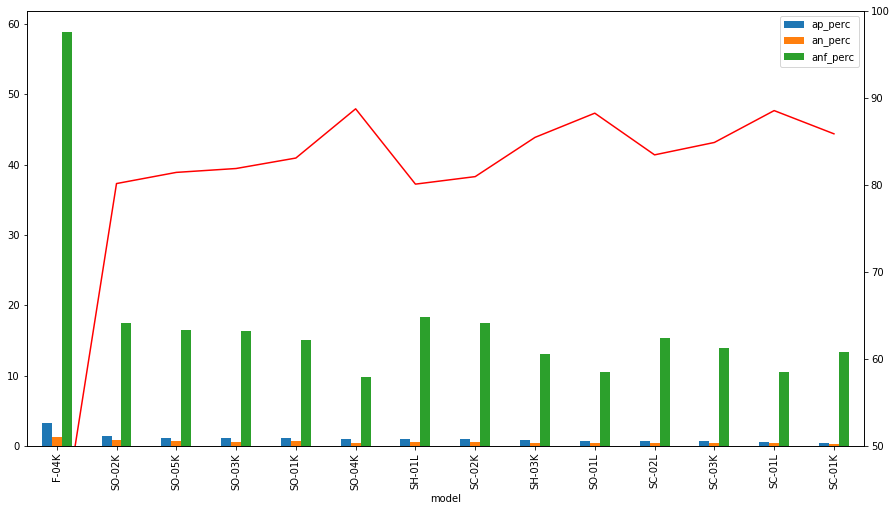

In [26]:
from numpy import array
from matplotlib import pyplot as plt
import numpy as np

ax1 = plt.gca()
ind = result_df['ua_perc']
ind_arr =  array(ind)
ind = np.arange(len(ind)) 
ax1.set_xticks(ind)
ax1.set_xlabel('')
result_df.plot(x="model", y=['ap_perc','an_perc','anf_perc'], kind="bar",ax=ax1,figsize=(15,8))
ax2 = ax1.twinx()
ax2.plot(ind, ind_arr, 'r-')
#ax2.set_ylabel('ignore_perc')
ax2.set_ylim((50.0,100.0))
plt.show()

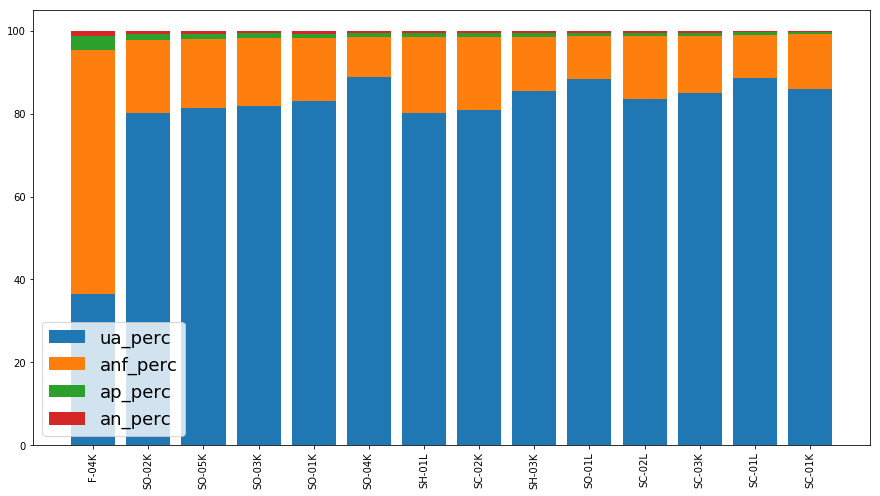

In [28]:
result_df_stack_bar = result_df[['model','ua_perc','anf_perc','ap_perc','an_perc']]
cumval=0
fig = plt.figure(figsize=(15,8))
for col in result_df_stack_bar.columns[~result_df_stack_bar.columns.isin(['model'])]:
    plt.bar(result_df_stack_bar.model, result_df_stack_bar[col], bottom=cumval, label=col)
    cumval = cumval+result_df_stack_bar[col]

_ = plt.xticks(rotation=90)
_ = plt.legend(fontsize=18)

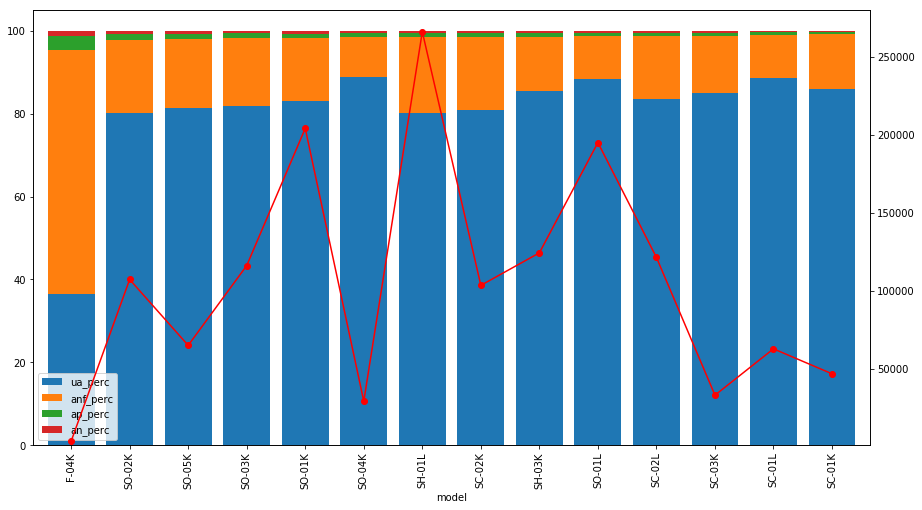

In [38]:
from numpy import array
import numpy as np
ax1 = plt.gca()
ind = result_df['sum']
ind_arr = array(ind)
ind = np.arange(len(ind)) 
ax1.set_xticks(ind)
#ax1.xaxis.set_visible(False)
result_df.plot(x="model", y=['ua_perc','anf_perc','ap_perc','an_perc'], kind="bar",stacked=True,ax=ax1,figsize=(15,8),width=0.8)
ax2 = ax1.twinx()
ax2.plot(ind, ind_arr, 'r--', linestyle='-', marker='o', color='red')
#ax2.set_ylabel('count')
ax2.set_ylim((1000,280000))
plt.show()